In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

# Regresión  para predecir la eficiencia del sueño

In [2]:
df = pd.read_csv('Sleep_Efficiency.csv')
df = df.set_index("ID")
df.head(3)

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
ID,,,,,,,,,,,,,,
1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0


In [3]:
df.dtypes

Age                         int64
Gender                     object
Bedtime                    object
Wakeup time                object
Sleep duration            float64
Sleep efficiency          float64
REM sleep percentage        int64
Deep sleep percentage       int64
Light sleep percentage      int64
Awakenings                float64
Caffeine consumption      float64
Alcohol consumption       float64
Smoking status             object
Exercise frequency        float64
dtype: object

In [4]:
df["Bedtime"] = pd.to_datetime(df["Bedtime"])
df["Wakeup time"] = pd.to_datetime(df["Wakeup time"])

In [5]:
df["Bedtime"] = df["Bedtime"].dt.time
df["Wakeup time"] = df["Wakeup time"].dt.time

In [6]:
df = df.replace("Yes", True)
df = df.replace("No", False)

/var/folders/gf/hzkntwn156z3rby6yvh1dlr80000gn/T/ipykernel_7793/3566044651.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace("No", False)


In [7]:
df.head(3)

,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
ID,,,,,,,,,,,,,,
1,65,Female,01:00:00,07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,True,3.0
2,69,Male,02:00:00,09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,True,3.0
3,40,Female,21:30:00,05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,False,3.0


In [8]:
print('Este dataset contiene {} filas y {} columnas'.format(df.shape[0], df.shape[1]))

Este dataset contiene 452 filas y 14 columnas


In [9]:
def datos_nulos(df):
    
    columnas = df.columns.values.tolist()

    for c, i in enumerate(columnas):
        p = columnas[c]
        v = pd.isna(df[columnas[c]]).values.ravel().sum()
        print(f"La columna {p} tiene {v} datos nulos" )

In [10]:
datos_nulos(df)

La columna Age tiene 0 datos nulos
La columna Gender tiene 0 datos nulos
La columna Bedtime tiene 0 datos nulos
La columna Wakeup time tiene 0 datos nulos
La columna Sleep duration tiene 0 datos nulos
La columna Sleep efficiency tiene 0 datos nulos
La columna REM sleep percentage tiene 0 datos nulos
La columna Deep sleep percentage tiene 0 datos nulos
La columna Light sleep percentage tiene 0 datos nulos
La columna Awakenings tiene 20 datos nulos
La columna Caffeine consumption tiene 25 datos nulos
La columna Alcohol consumption tiene 14 datos nulos
La columna Smoking status tiene 0 datos nulos
La columna Exercise frequency tiene 6 datos nulos


## Tratamiento de datos nulos

In [11]:
df['Awakenings'] = df['Awakenings'].fillna(df['Awakenings'].median())
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].median())
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].median())
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].median())

In [12]:
datos_nulos(df)

La columna Age tiene 0 datos nulos
La columna Gender tiene 0 datos nulos
La columna Bedtime tiene 0 datos nulos
La columna Wakeup time tiene 0 datos nulos
La columna Sleep duration tiene 0 datos nulos
La columna Sleep efficiency tiene 0 datos nulos
La columna REM sleep percentage tiene 0 datos nulos
La columna Deep sleep percentage tiene 0 datos nulos
La columna Light sleep percentage tiene 0 datos nulos
La columna Awakenings tiene 0 datos nulos
La columna Caffeine consumption tiene 0 datos nulos
La columna Alcohol consumption tiene 0 datos nulos
La columna Smoking status tiene 0 datos nulos
La columna Exercise frequency tiene 0 datos nulos


## Exploración de datos

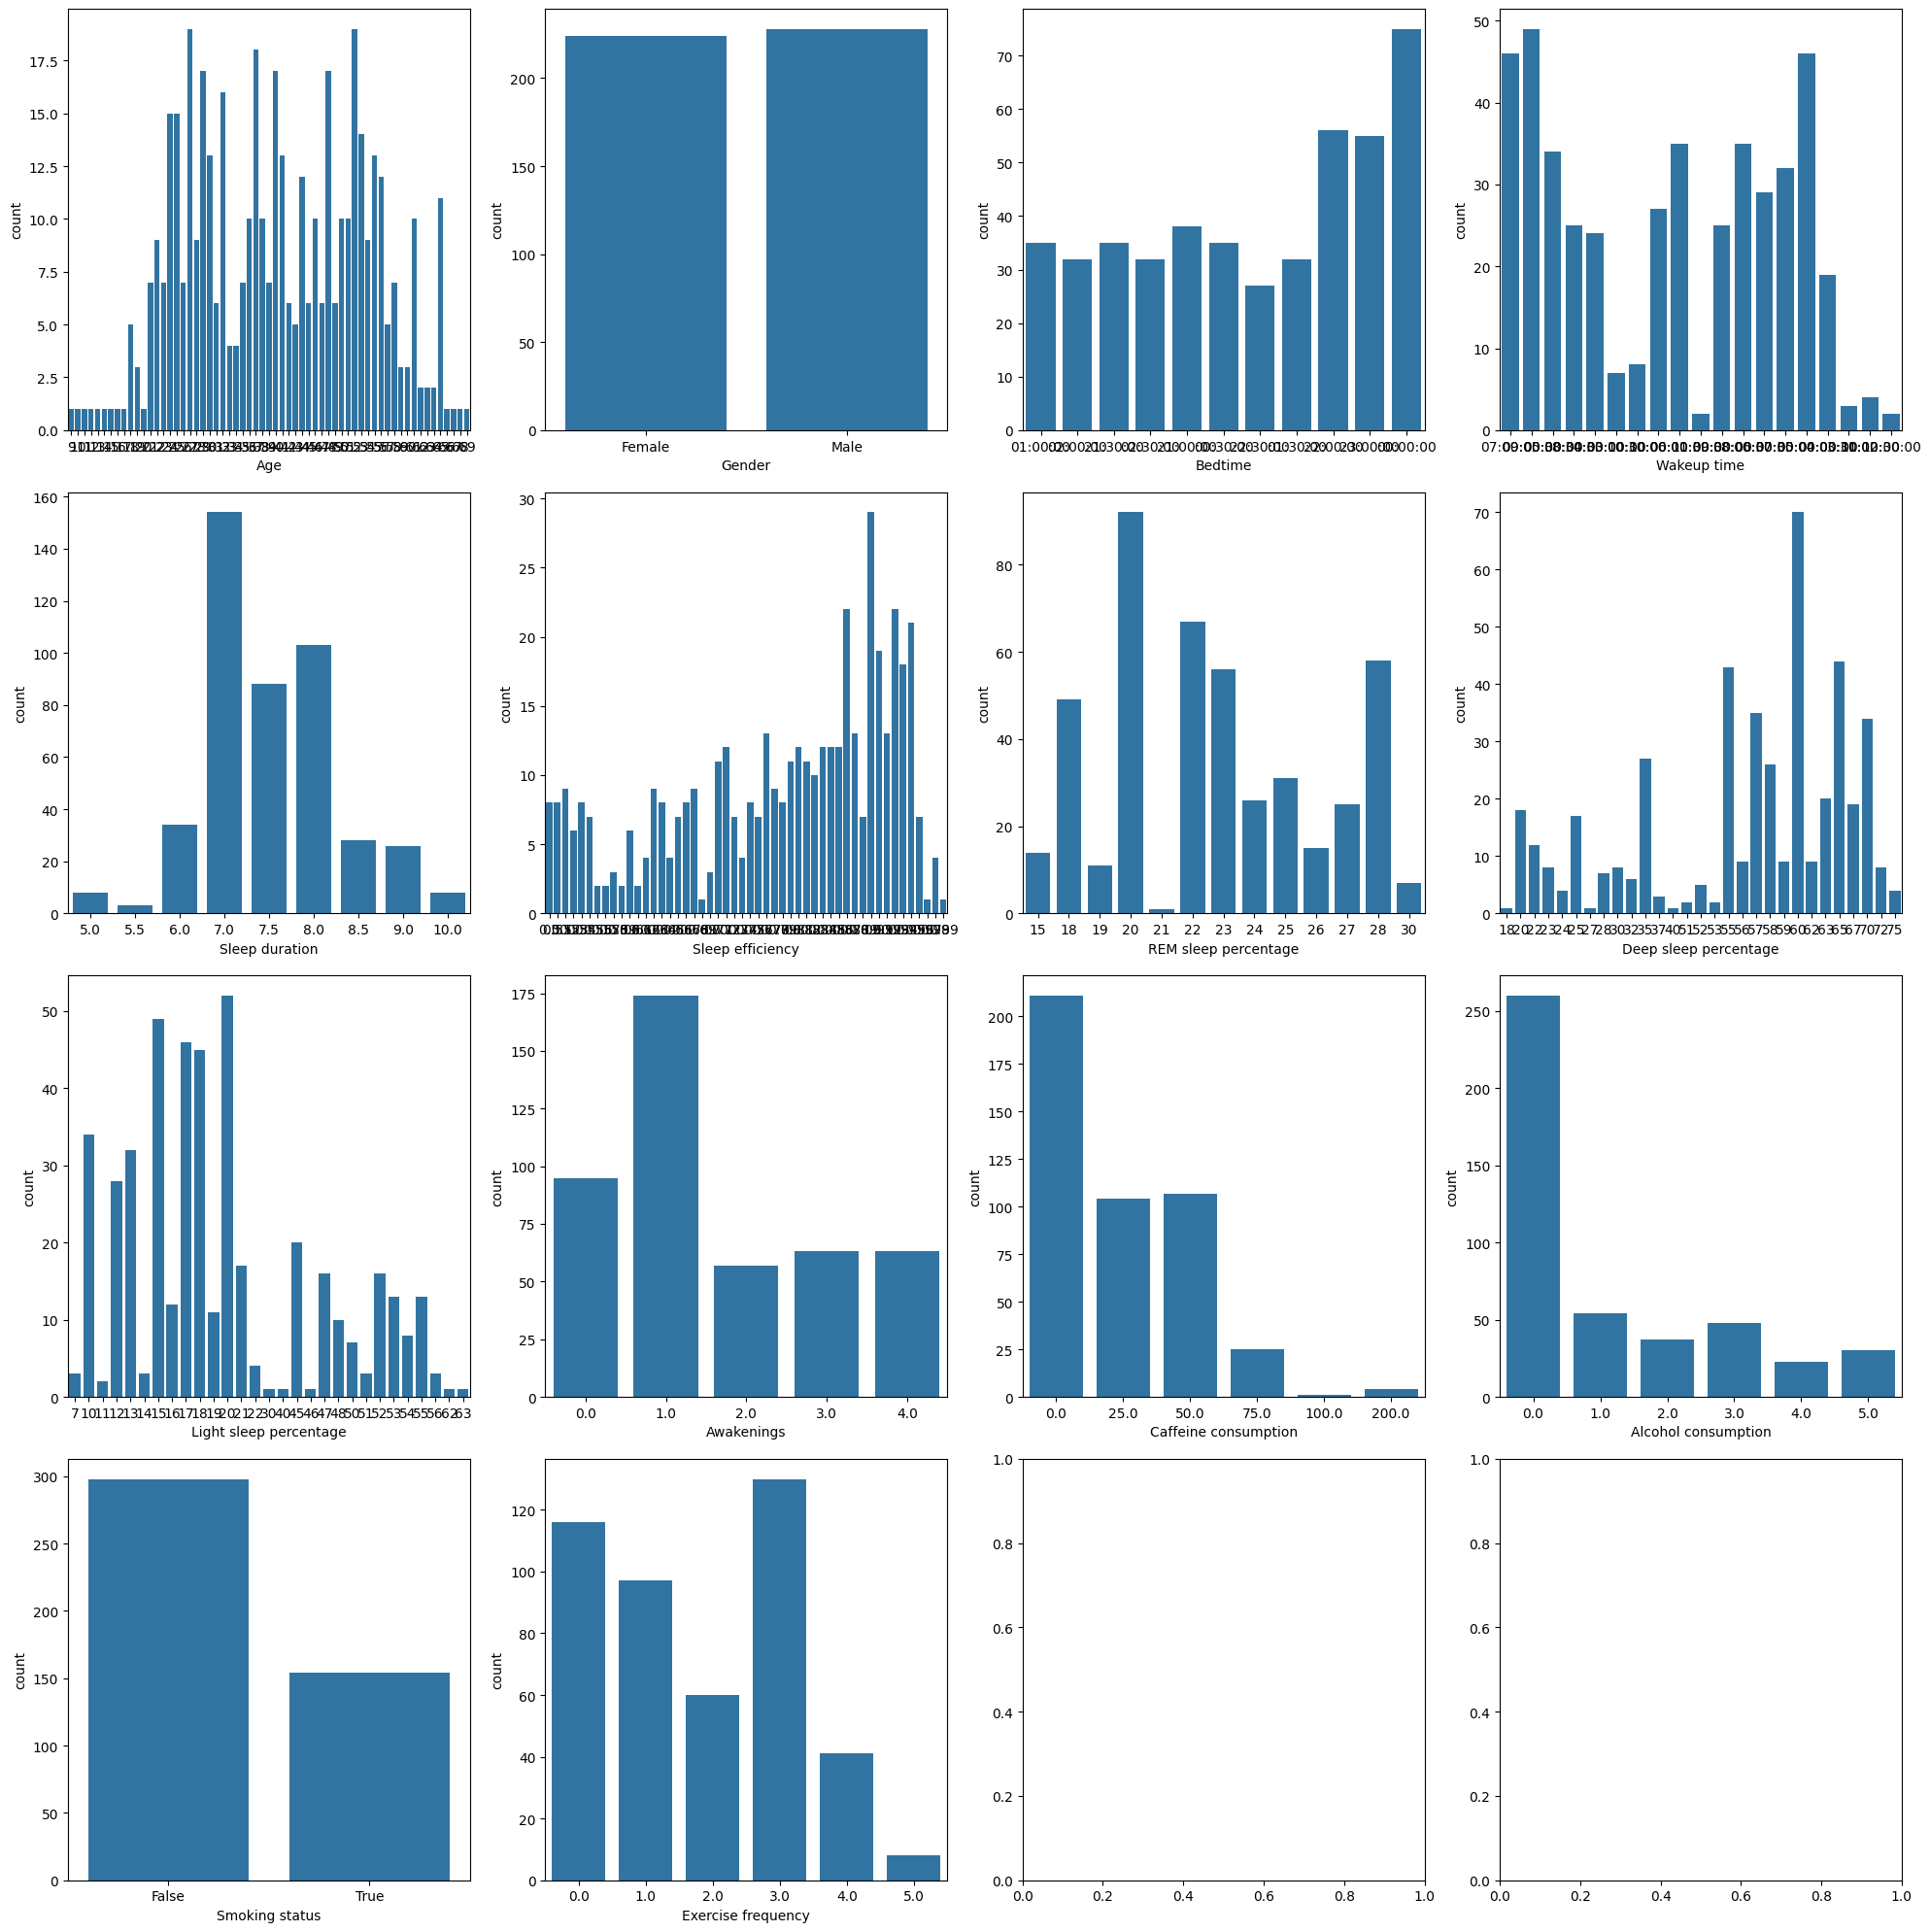

In [13]:
fig, axs = plt.subplots(4, 4, figsize=(20, 20))

variables = df.columns  
for i in range(4):
    for j in range(4):
        if 4*i+j < len(variables):  
            sns.countplot(x=variables[4*i+j], data=df, ax=axs[i, j])

plt.tight_layout()
plt.show()

## Tratamiento de datos categoricos

In [14]:
cat_columns = ["Gender"]
df = pd.get_dummies(df,columns=cat_columns, drop_first=True)
df.head(3)

,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Gender_Male
ID,,,,,,,,,,,,,,
1,65,01:00:00,07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,True,3.0,False
2,69,02:00:00,09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,True,3.0,True
3,40,21:30:00,05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,False,3.0,False


In [15]:
fecha = pd.to_datetime("05:30:00")

In [16]:
df["Bedtime"] = df["Bedtime"].apply(lambda x: x.hour + x.minute/60)
df["Wakeup time"] = df["Wakeup time"].apply(lambda x: x.hour + x.minute/60)                                   

In [17]:
df.head(3)

,Age,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency,Gender_Male
ID,,,,,,,,,,,,,,
1,65,1.0,7.0,6.0,0.88,18,70,12,0.0,0.0,0.0,True,3.0,False
2,69,2.0,9.0,7.0,0.66,19,28,53,3.0,0.0,3.0,True,3.0,True
3,40,21.5,5.5,8.0,0.89,20,70,10,1.0,0.0,0.0,False,3.0,False


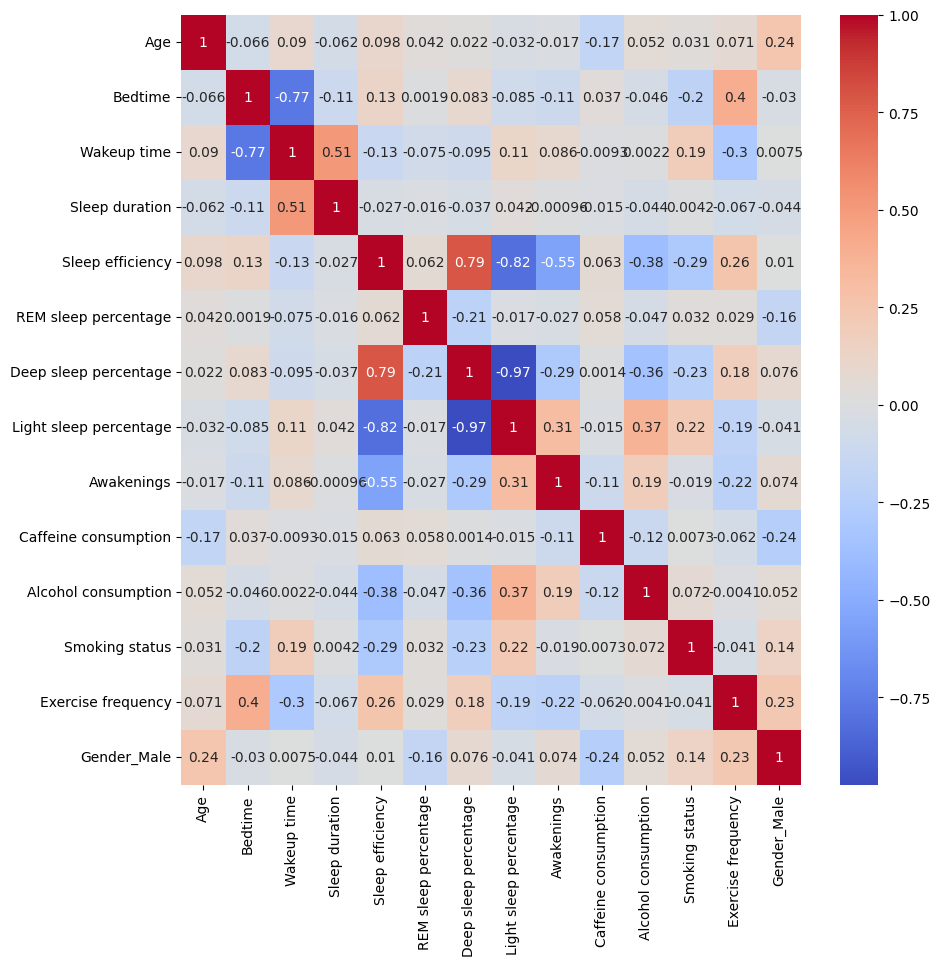

In [18]:
corr = df.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm')

# Mostrar el gráfico
plt.show()

## Entrenar el modelo

### Seleccionar las variables predictoras

In [35]:
X = df.drop(columns='Sleep efficiency')

In [36]:
y = df["Sleep efficiency"]

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(f"Entrenamiento: {X_train.shape,y_train.shape}")
print(f"Prueba: {X_test.shape,y_test.shape}")

Entrenamiento: ((361, 13), (361,))
Prueba: ((91, 13), (91,))


### Normalización o Escalamiento de variables

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
#model = linear_model.SGDRegressor(max_iter=100, tol=1e-3)
model = linear_model.Ridge(max_iter=100, tol=1e-3)
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
model.fit(X_train, y_train)

Ridge(max_iter=100, tol=0.001)

In [41]:
#Desempeño en el conjunto de entrenamiento
print(f"R2 Score Train: {model.score(X_train, y_train)}")
print(f"R2 Score Test: {model.score(X_test, y_test)}")

R2 Score Train: 0.7967297450967056
R2 Score Test: 0.8263048751451556


## Regresión Lineal

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [44]:
y_pred_test = model.predict(X_test)

In [45]:
print(f"R2 Score Train: {model.score(X_train, y_train)}")
print(f"R2 Score Test: {model.score(X_test, y_test)}")

R2 Score Train: 0.796731534480664
R2 Score Test: 0.8263465864005662


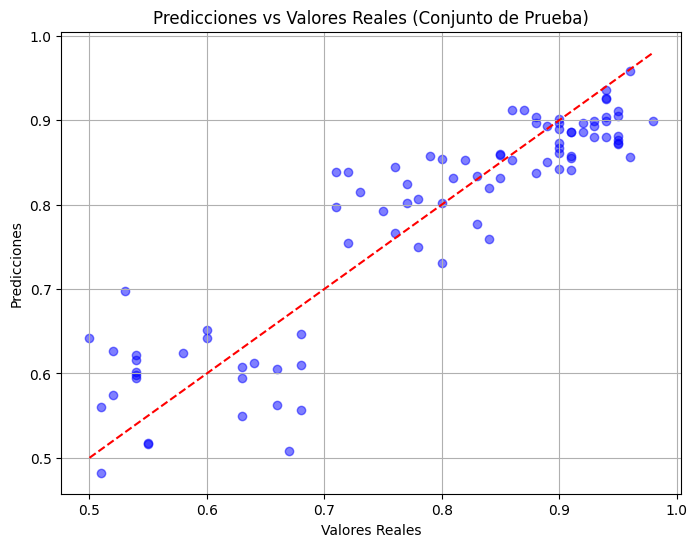

In [46]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales (Conjunto de Prueba)')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()

## Arbol de decisión

In [54]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
cv_scores = cross_val_score(model, X_train, y_train, cv=10)
model.fit(X_train, y_train)

print(f"R2 Score Train: {model.score(X_train, y_train)}")
print(f"R2 Score Test: {model.score(X_test, y_test)}")

R2 Score Train: 1.0
R2 Score Test: 0.7919326109544307


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestRegressor()


param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [None, 10, 20],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

grid_search_rf = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='r2')

grid_search_rf.fit(X_train, y_train)

best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_

y_pred_train_rf = best_model_rf.predict(X_train)
y_pred_test_rf = best_model_rf.predict(X_test)
r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"Mejores hiperparámetros: {best_params_rf}")
print(f"R^2 en el conjunto de entrenamiento: {r2_train_rf}")
print(f"R^2 en el conjunto de prueba: {r2_test_rf}")


Mejores hiperparámetros: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
R^2 en el conjunto de entrenamiento: 0.9632358187115423
R^2 en el conjunto de prueba: 0.8511044417460196


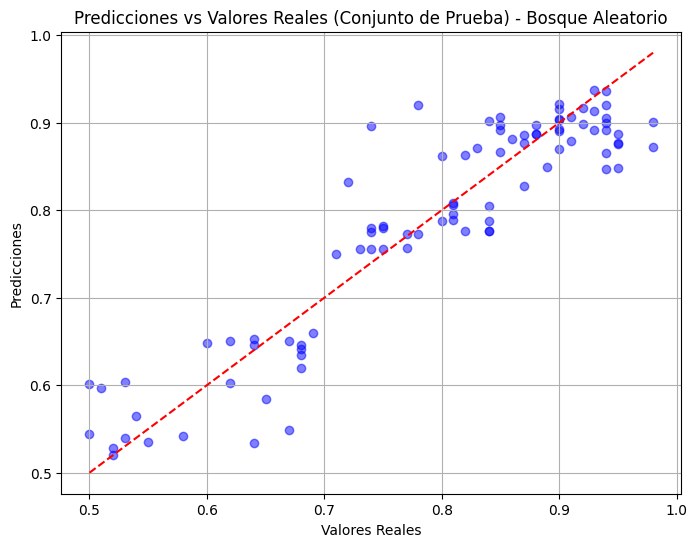

In [34]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_rf, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales (Conjunto de Prueba) - Bosque Aleatorio')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.grid(True)
plt.show()